<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [5]:
df[['ConvertedComp']]

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
11393,130000.0
11394,19880.0
11395,105000.0
11396,80371.0


In [6]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [7]:
df['ConvertedComp'].describe().apply(lambda x: format(x, 'f'))

count      10582.000000
mean      131596.731620
std       294786.515775
min            0.000000
25%        26868.000000
50%        57745.000000
75%       100000.000000
max      2000000.000000
Name: ConvertedComp, dtype: object

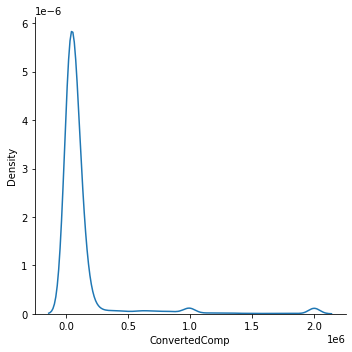

In [8]:
sns.displot(df, x="ConvertedComp", kind="kde")

Plot the histogram for the column `ConvertedComp`.


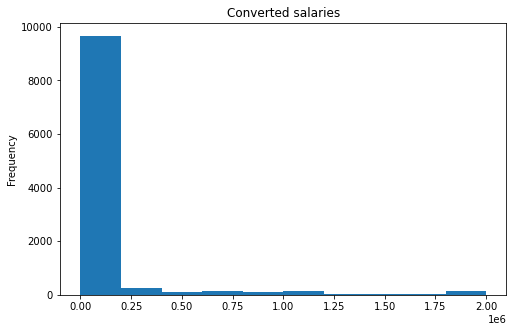

In [9]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Converted salaries')
# add y-label
# plt.ylabel('')
# add x-label
#plt.xlabel('')

plt.show()

What is the median of the column `ConvertedComp`?


In [10]:
df['ConvertedComp'].describe().apply(lambda x: format(x, 'f'))

count      10582.000000
mean      131596.731620
std       294786.515775
min            0.000000
25%        26868.000000
50%        57745.000000
75%       100000.000000
max      2000000.000000
Name: ConvertedComp, dtype: object

In [11]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [12]:
# to know correct names of the columns
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [13]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [14]:
df.loc[df['Gender'] == 'Man', ['Gender']].count()

Gender    10480
dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
df.loc[df['Gender'] == 'Woman', ['ConvertedComp']].median()

ConvertedComp    57708.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [16]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


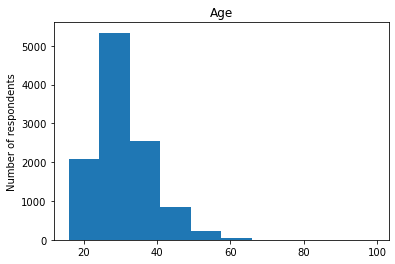

In [17]:
plt.hist(df['Age'])
plt.title('Age')
plt.ylabel('Number of respondents')

plt.show()

In [18]:
# quiz
df['Age'].median()

29.0

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


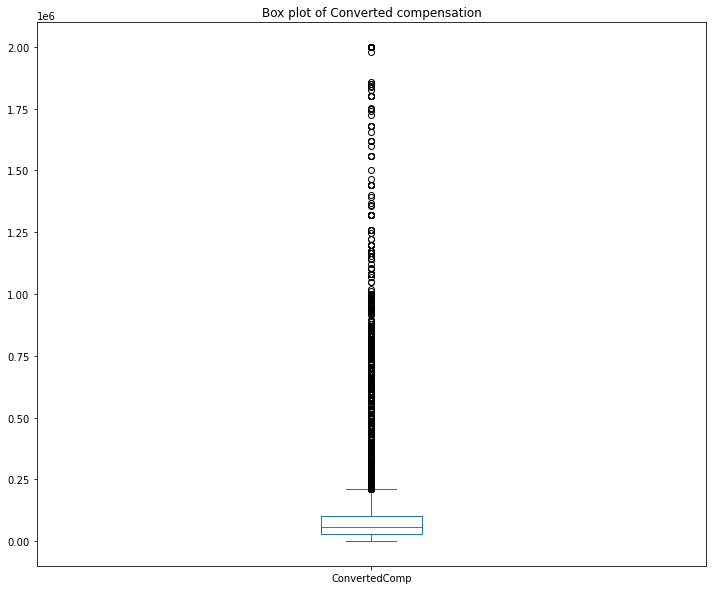

In [19]:
df['ConvertedComp'].plot(kind='box', figsize=(12, 10))

plt.title('Box plot of Converted compensation')
#plt.ylabel('')

plt.show()

In [20]:
df['ConvertedComp'].describe().apply(lambda x: format(x, 'f'))

count      10582.000000
mean      131596.731620
std       294786.515775
min            0.000000
25%        26868.000000
50%        57745.000000
75%       100000.000000
max      2000000.000000
Name: ConvertedComp, dtype: object

In [21]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
print('Q1: ', Q1)
print('Q3: ', Q3)

Q1:  26868.0
Q3:  100000.0


Find out the Inter Quartile Range for the column ConvertedComp

In [22]:
# Inter Quartile Range for the column ConvertedComp
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [23]:
# upper and lower limits
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
print('lower_lim :', lower_lim)
print('upper_lim :', upper_lim)

lower_lim : -82830.0
upper_lim : 209698.0


Identify how many outliers are there in the ConvertedComp column.

In [24]:
# I'm looking just for upper outliers, because compensation cannot be negative value
outliers_up = (df['ConvertedComp'] > upper_lim)
outliers_up

0        False
1        False
2        False
3         True
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool

In [25]:
len(df['ConvertedComp'][outliers_up])

879

In [26]:
# just checking to prove point. Result should be 0
outliers_low = (df['ConvertedComp'] < lower_lim)
len(df['ConvertedComp'][outliers_low])

0

In [27]:
len(df['ConvertedComp'][(outliers_low | outliers_up)])

879

Create a new dataframe by removing the outliers from the ConvertedComp column.

In [28]:
df.shape

(11398, 85)

In [29]:
# df2 - df without outliers
df2 = df[~(outliers_low | outliers_up)]
df2.shape

(10519, 85)

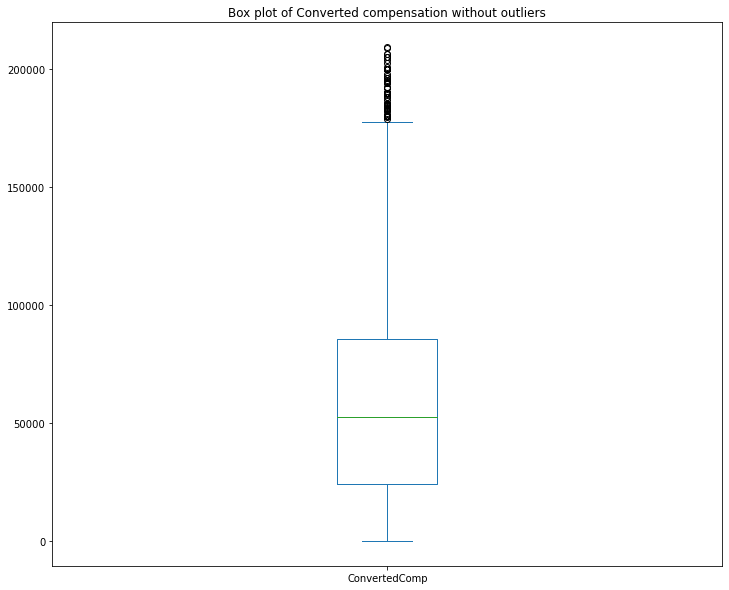

In [30]:
df2['ConvertedComp'].plot(kind='box', figsize=(12, 10))

plt.title('Box plot of Converted compensation without outliers')
#plt.ylabel('')

plt.show()

In [31]:
df2['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

### Box plot of Age

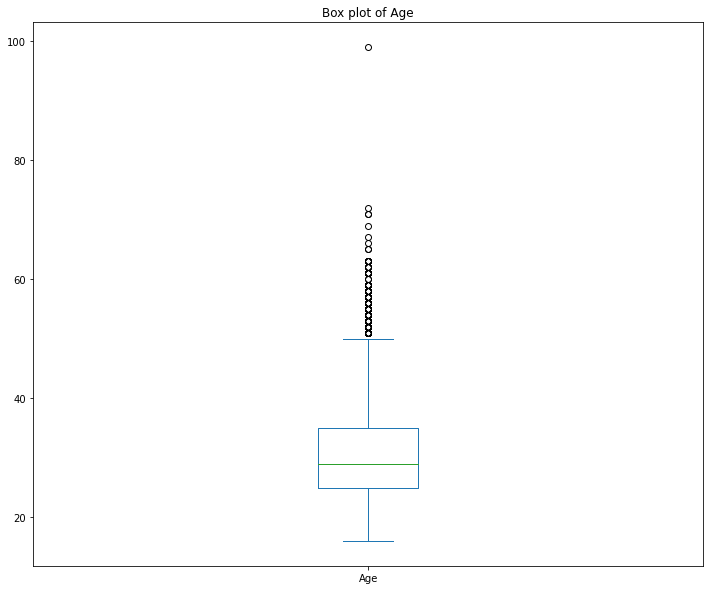

In [32]:
df['Age'].plot(kind='box', figsize=(12, 10))

plt.title('Box plot of Age')
#plt.ylabel('')

plt.show()

In [33]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

-------------------------------------------------------------------------------------------------------------------

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [34]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


In [35]:
# We can use the Pandas method corr() to find the feature other than Age that is most correlated with Age
df.corr()['Age'].sort_values()

CodeRevHrs      -0.020469
Respondent       0.004041
CompTotal        0.006970
WorkWeekHrs      0.036518
ConvertedComp    0.105386
Age              1.000000
Name: Age, dtype: float64

Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
